# Exploración de Datos

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("../data/Bank_Transaction_Fraud_Detection.csv")

## Información de Datos

In [ ]:
data.head(n=10)

In [ ]:
print(f"El dataset contiene {data.shape[0]} filas y {data.shape[1]} columnas.")

In [ ]:
# Contar transacciones por cada Customer_ID
transaction_counts = data.groupby("Customer_ID")["Transaction_ID"].count()

# Filtrar cuentas con más de una transacción
accounts_with_multiple_transactions = transaction_counts[transaction_counts > 1]

# Contar la cantidad de cuentas que cumplen la condición
num_accounts = accounts_with_multiple_transactions.shape[0]

print(f"Número de cuentas con más de una transacción: {num_accounts}")

In [ ]:
# Contar transacciones por cada Customer_Name
transaction_counts_by_name = data.groupby("Customer_Name")["Transaction_ID"].count()

# Filtrar los nombres con más de una transacción
names_with_multiple_transactions = transaction_counts_by_name[transaction_counts_by_name > 1]

# Contar la cantidad de nombres que cumplen la condición
num_names_with_multiple_transactions = names_with_multiple_transactions.shape[0]

print(f"Número de clientes con más de una transacción: {num_names_with_multiple_transactions}")

# Mostrar la cantidad de transacciones por cliente
print("Cantidad de transacciones por cliente:")
print(names_with_multiple_transactions)


In [ ]:
# Contar cuántas veces aparece cada nombre
name_counts = data["Customer_Name"].value_counts()

# Filtrar los nombres que aparecen más de una vez
repeated_names = name_counts[name_counts > 1]

# Mostrar los nombres repetidos
print(repeated_names)


In [ ]:
# Contar cuántas veces aparece cada correo
email_counts = data["Customer_Email"].value_counts()

# Filtrar los correos que aparecen más de una vez
repeated_emails = email_counts[email_counts > 1]

# Mostrar los correos repetidos junto con su cantidad de apariciones
print(repeated_emails)

# Contar cuántas veces aparece cada correo
contact_counts = data["Customer_Contact"].value_counts()

# Filtrar los correos que aparecen más de una vez
repeated_contact = contact_counts[contact_counts > 1]

# Mostrar los correos repetidos junto con su cantidad de apariciones
print(repeated_contact)




In [ ]:
# Agrupar por el número de teléfono y obtener los clientes asociados a cada número
grouped_by_contact = data.groupby("Customer_Contact")["Customer_Name"].apply(list)

# Filtrar para mostrar solo los números con más de un cliente
duplicated_contacts = grouped_by_contact[grouped_by_contact.apply(len) > 1]

# Mostrar los resultados con la cantidad de clientes asociados a cada número
duplicated_contacts_with_count = duplicated_contacts.apply(lambda x: (x, len(x)))

# Imprimir la información separada
for contact, (names, count) in duplicated_contacts_with_count.items():
    print(f"Number: {contact}")
    print(f"Names: {', '.join(names)}")
    print(f"Count: {count}")
    print("="*40)


In [ ]:
# Agrupar por el correo electrónico y obtener los clientes asociados a cada email
grouped_by_email = data.groupby("Customer_Email")["Customer_Name"].apply(list)

# Filtrar para mostrar solo los correos con más de un cliente
duplicated_emails = grouped_by_email[grouped_by_email.apply(len) > 1]

# Mostrar los resultados con la cantidad de clientes asociados a cada correo
duplicated_emails_with_count = duplicated_emails.apply(lambda x: (x, len(x)))

# Imprimir la información separada
for email, (names, count) in duplicated_emails_with_count.items():
    print(f"Email: {email}")
    print(f"Names: {', '.join(names)}")
    print(f"Count: {count}")
    print("="*40)


## Valores Duplicados y Nulos

In [ ]:
nulos = data.isnull().sum()
flag_nulos = nulos.sum() > 0

duplicados = data.duplicated()
flag_duplicados = duplicados.sum() > 0

print(f"Existen {nulos.sum()} valores nulos.")
if flag_nulos:
  print("Vista previa de valores nulos:\n", nulos[nulos > 0])

print(f"Existen {duplicados.sum()} valores duplicados.")
if flag_duplicados:
  print("Vista previa de valores duplicados:\n", data[duplicados])

## Exploración de Atributos/Columnas

In [ ]:
count = 1
for column in data.columns:
  print(f"{count}. {column}")
  count +=1

In [ ]:
data.dtypes

In [ ]:
print(data["Device_Type"].nunique())
print(data["Device_Type"].unique())

print(data["Transaction_Device"].nunique())
print(data["Transaction_Device"].unique())


In [ ]:
data["Device_Type"].nunique()
data["Device_Type"].unique()
# Definir el mapeo de Device_Type a Device_Trust_Score
trust_scores = {
    "ATM": 0.85,
    "POS": 0.65,
    "Mobile": 0.80,
    "Desktop": 0.70
}

# Crear la nueva columna basado en Device_Type
data["Device_Trust_Score"] = data["Device_Type"].map(trust_scores)

data.head()

In [ ]:
df = data.copy()

# Eliminar " Branch" de la columna Bank_Branch
df['Branch_Clean'] = df['Bank_Branch'].str.replace(' Branch$', '', regex=True)

# Filtrar índices donde City y Branch_Clean no coinciden
indices_diferentes = df[df['City'] != df['Branch_Clean']].index.tolist()

print("Índices con diferencias:", indices_diferentes)

In [ ]:
# Renombrar la columna Is_Fraud y convertir valores de 0/1 a booleano (False/True)
data.rename(columns={"Is_Fraud": "Is_Fraud_Teoric"}, inplace=True)
data["Is_Fraud_Teoric"] = data["Is_Fraud_Teoric"].astype(bool)

## Edición de Datos

In [ ]:
if "Transaction_Date" in data.columns and "Transaction_Time" in data.columns:
    
    data["Transaction_Date_Time"] = pd.to_datetime(
        data["Transaction_Date"] + " " + data["Transaction_Time"], 
        format="%d-%m-%Y %H:%M:%S"
    )
    
    
    data.drop(columns=["Transaction_Date", "Transaction_Time"], inplace=True)

    print("Columna 'Transaction_Date_Time' creada correctamente.")
else:
    print("ERROR: No se encontraron las columnas 'Transaction_Date' y 'Transaction_Time' en el CSV.")

# Definir las nuevas columnas y llenarlas con None (equivalente a NULL en bases de datos)
new_columns = {
    "Fraud_Score": None,             # Float (Puntaje de riesgo de fraude)
    "Account_ID": None,              # String (Identificador de la cuenta bancaria)
    "Open_Date": None,               # Date (Fecha de apertura de la cuenta)
    "Status": None,                  # String (Estado de la cuenta)
    "Merchant_Name": None,           # String (Nombre del comerciante)
    "Merchant_Location": None,       # String (Ubicación del comerciante)
    "Risk_Level": None,              # Int (Nivel de riesgo del comerciante)
    "Device_ID": None,               # String (Identificador del dispositivo)
    "Device_Location": None,         # String (Ubicación del dispositivo)
    "Is_Compromised": None           # Boolean (Si el dispositivo ha sido comprometido)
}

# Agregar las nuevas columnas al DataFrame
for col, value in new_columns.items():
    data[col] = value

# Tomar una muestra del DataFrame (10% en este caso)
data = data.sample(frac=0.1, random_state=42)
data.to_csv("../data/data_clean.csv", index=False)
print("Archivo guardado correctamente: data_clean.csv")
print(data.head())

## Modelo Predictivo

Primeras filas del dataset:
   Gender       Age  State  City  Bank_Branch  Account_Type  \
0       0  1.699230     19    23           23             1   
1       0 -1.120383     12   120          120             0   
2       0 -0.595804     24   110          110             0   
3       1  0.781217      5    21           21             2   
4       1 -1.448245     10     2            2             2   

   Transaction_Amount  Transaction_Type  Merchant_Category  Account_Balance  \
0            0.859189                 0                  3        -0.918387   
1           -0.530921                 1                  0        -1.302986   
2           -0.503505                 4                  5         0.997657   
3           -1.587090                 3                  2        -1.595894   
4           -1.260510                 0                  5         0.717676   

   Transaction_Device  Transaction_Location  Device_Type  Is_Fraud_Teoric  \
0                  10                    

d:\UVG GitHub Repositorios\2025\BBDD2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


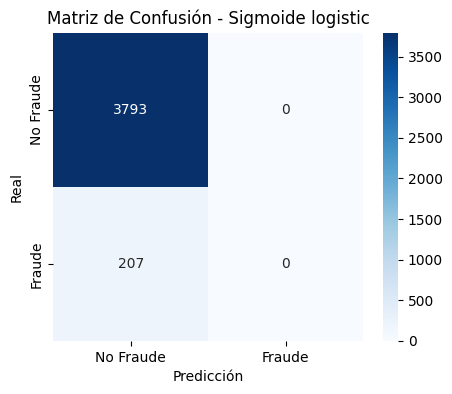


Probando con la sigmoide: tanh
Exactitud: 0.9483
Precisión: 0.0000
Recall: 0.0000
F1-score: 0.0000


d:\UVG GitHub Repositorios\2025\BBDD2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


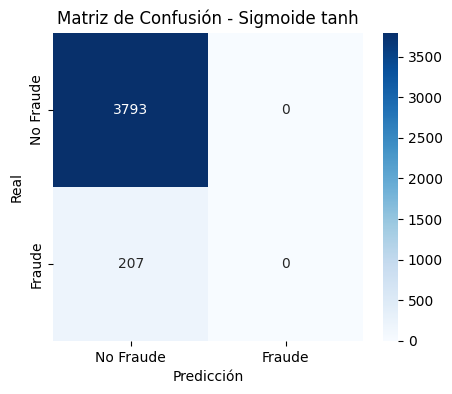


Probando con la sigmoide: expit
Exactitud: 0.9483
Precisión: 0.0000
Recall: 0.0000
F1-score: 0.0000


d:\UVG GitHub Repositorios\2025\BBDD2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


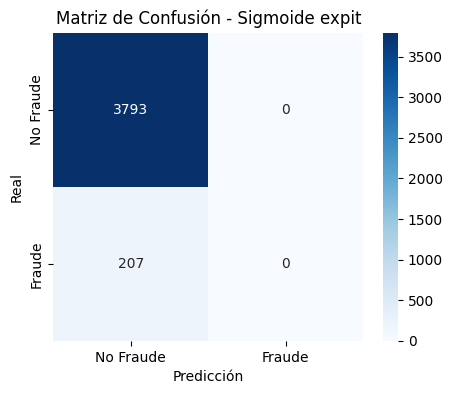


Comparación de resultados entre funciones sigmoides:
          accuracy  precision  recall   f1
logistic   0.94825        0.0     0.0  0.0
tanh       0.94825        0.0     0.0  0.0
expit      0.94825        0.0     0.0  0.0


<Figure size 1000x500 with 0 Axes>

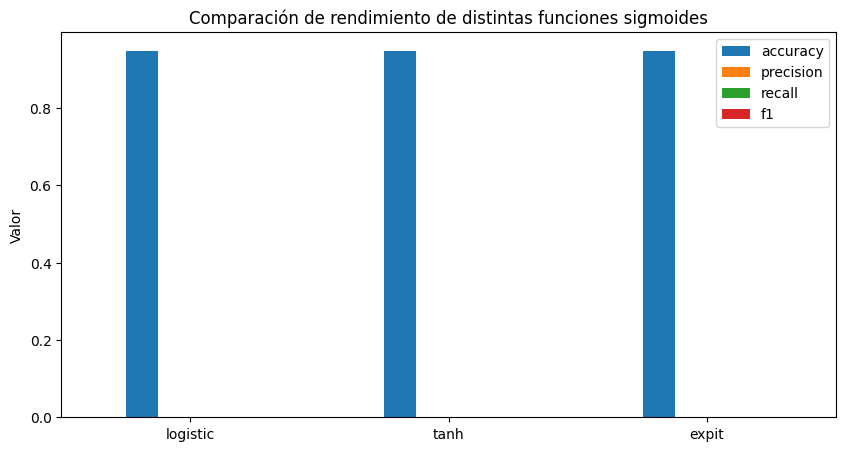

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import scipy.special

# 1. Cargar los datos
data = pd.read_csv("../data/data_clean.csv")

# 2. Preprocesamiento
# Eliminar columnas innecesarias (por ejemplo, identificadores únicos)
drop_cols = [
  "Customer_ID", "Customer_Name", "Transaction_ID", "Merchant_ID", "Customer_Contact", 
  "Customer_Email", "Transaction_Description", "Transaction_Date_Time", 
  "Fraud_Score", "Account_ID", "Open_Date", "Status", 
  "Merchant_Name", "Merchant_Location", "Risk_Level", 
  "Device_ID", "Device_Location", "Is_Compromised"
]

data = data.drop(columns=drop_cols)

# Convertir la variable objetivo a binaria
data["Is_Fraud_Teoric"] = data["Is_Fraud_Teoric"].astype(int)

# Codificar variables categóricas
categorical_cols = ["Gender", "State", "City", "Bank_Branch", "Account_Type", "Transaction_Type", "Merchant_Category", "Transaction_Device", "Transaction_Location", "Device_Type", "Transaction_Currency"]
for col in categorical_cols:
  data[col] = LabelEncoder().fit_transform(data[col])

# Normalizar las variables numéricas
num_cols = ["Age", "Transaction_Amount", "Account_Balance", "Device_Trust_Score"]
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# 3. Exploración
print("Primeras filas del dataset:")
print(data.head())

print("\nInformación del dataset:")
print(data.info())

# 4. División en Train y Test
X = data.drop(columns=["Is_Fraud_Teoric"])
y = data["Is_Fraud_Teoric"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Función sigmoide personalizada
def sigmoid(x, version='default'):
  if version == 'logistic':
    return 1 / (1 + np.exp(-x))
  elif version == 'tanh':
    return (np.tanh(x) + 1) / 2  # Normalización de la tangente hiperbólica
  elif version == 'expit':  # Función de scipy
    return scipy.special.expit(x)
  else:
    return 1 / (1 + np.exp(-x))  # Default

# 6. Entrenar el modelo de Regresión Logística con distintas sigmoides
sigmoid_versions = ["logistic", "tanh", "expit"]
results = {}

for version in sigmoid_versions:
  print(f"\nProbando con la sigmoide: {version}")

  # Definir el modelo de Regresión Logística
  model = LogisticRegression(solver='lbfgs', max_iter=1000)
  
  # Entrenar el modelo
  model.fit(X_train, y_train)
  
  # Hacer predicciones
  y_pred = model.predict(X_test)
  
  # Evaluar el modelo
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f"Exactitud: {accuracy:.4f}")
  print(f"Precisión: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-score: {f1:.4f}")

  # Guardar resultados
  results[version] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

  # Matriz de Confusión
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(5, 4))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
  plt.xlabel("Predicción")
  plt.ylabel("Real")
  plt.title(f"Matriz de Confusión - Sigmoide {version}")
  plt.show()

# 7. Comparación de Resultados
results_df = pd.DataFrame(results).T
print("\nComparación de resultados entre funciones sigmoides:")
print(results_df)

# Visualizar la comparación
plt.figure(figsize=(10, 5))
results_df.plot(kind="bar", figsize=(10,5))
plt.xticks(rotation=0)
plt.title("Comparación de rendimiento de distintas funciones sigmoides")
plt.ylabel("Valor")
plt.legend(loc="best")
plt.show()


Exactitud: 0.8665
Precisión: 0.0471
Recall: 0.0821
F1-score: 0.0599


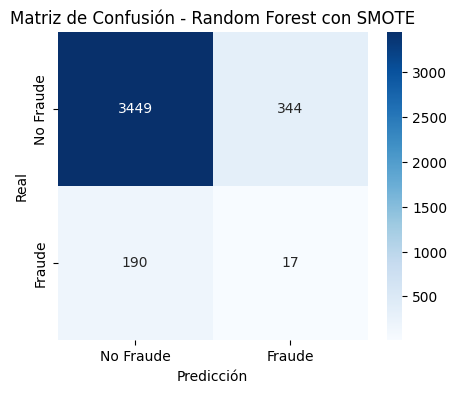

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# 1. Cargar los datos
data = pd.read_csv("../data/data_clean.csv")

# 2. Preprocesamiento
drop_cols = [
  "Customer_ID", "Customer_Name", "Transaction_ID", "Merchant_ID", "Customer_Contact",
  "Customer_Email", "Transaction_Description", "Transaction_Date_Time",
  "Fraud_Score", "Account_ID", "Open_Date", "Status",
  "Merchant_Name", "Merchant_Location", "Risk_Level",
  "Device_ID", "Device_Location", "Is_Compromised"
]

data = data.drop(columns=drop_cols)

# Convertir la variable objetivo a binaria
data["Is_Fraud_Teoric"] = data["Is_Fraud_Teoric"].astype(int)

# Codificar variables categóricas
categorical_cols = ["Gender", "State", "City", "Bank_Branch", "Account_Type", "Transaction_Type",
                    "Merchant_Category", "Transaction_Device", "Transaction_Location", "Device_Type", "Transaction_Currency"]
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Normalizar las variables numéricas
num_cols = ["Age", "Transaction_Amount", "Account_Balance", "Device_Trust_Score"]
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# 3. División en Train y Test
X = data.drop(columns=["Is_Fraud_Teoric"])
y = data["Is_Fraud_Teoric"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Balanceo de datos con SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 5. Modelo Random Forest con balanceo de clases
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 6. Predicciones
y_probs = model.predict_proba(X_test)[:, 1]  # Obtener probabilidades de fraude
new_threshold = 0.3  # Ajustar el umbral para detectar más fraudes
y_pred_adjusted = (y_probs > new_threshold).astype(int)

# 7. Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

print(f"Exactitud: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# 8. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest con SMOTE")
plt.show()
